# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import numpy as np

In [3]:
df = pd.read_csv("data/temps.csv")

In [4]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [6]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [7]:
# Define el diccionario de mapeo
day_mapping = {
    "Mon": 0,
    "Tues": 1,
    "Wed": 2,
    "Thurs": 3,
    "Fri": 4,
    "Sat": 5,
    "Sun": 6
}

# Asegúrate de que los valores están en minúsculas, aplica el mapeo y convierte el resultado a float64
df["week"] = df["week"].map(day_mapping)

# Verifica el resultado
print(df[["week"]].head())


   week
0     4
1     5
2     6
3     0
4     1


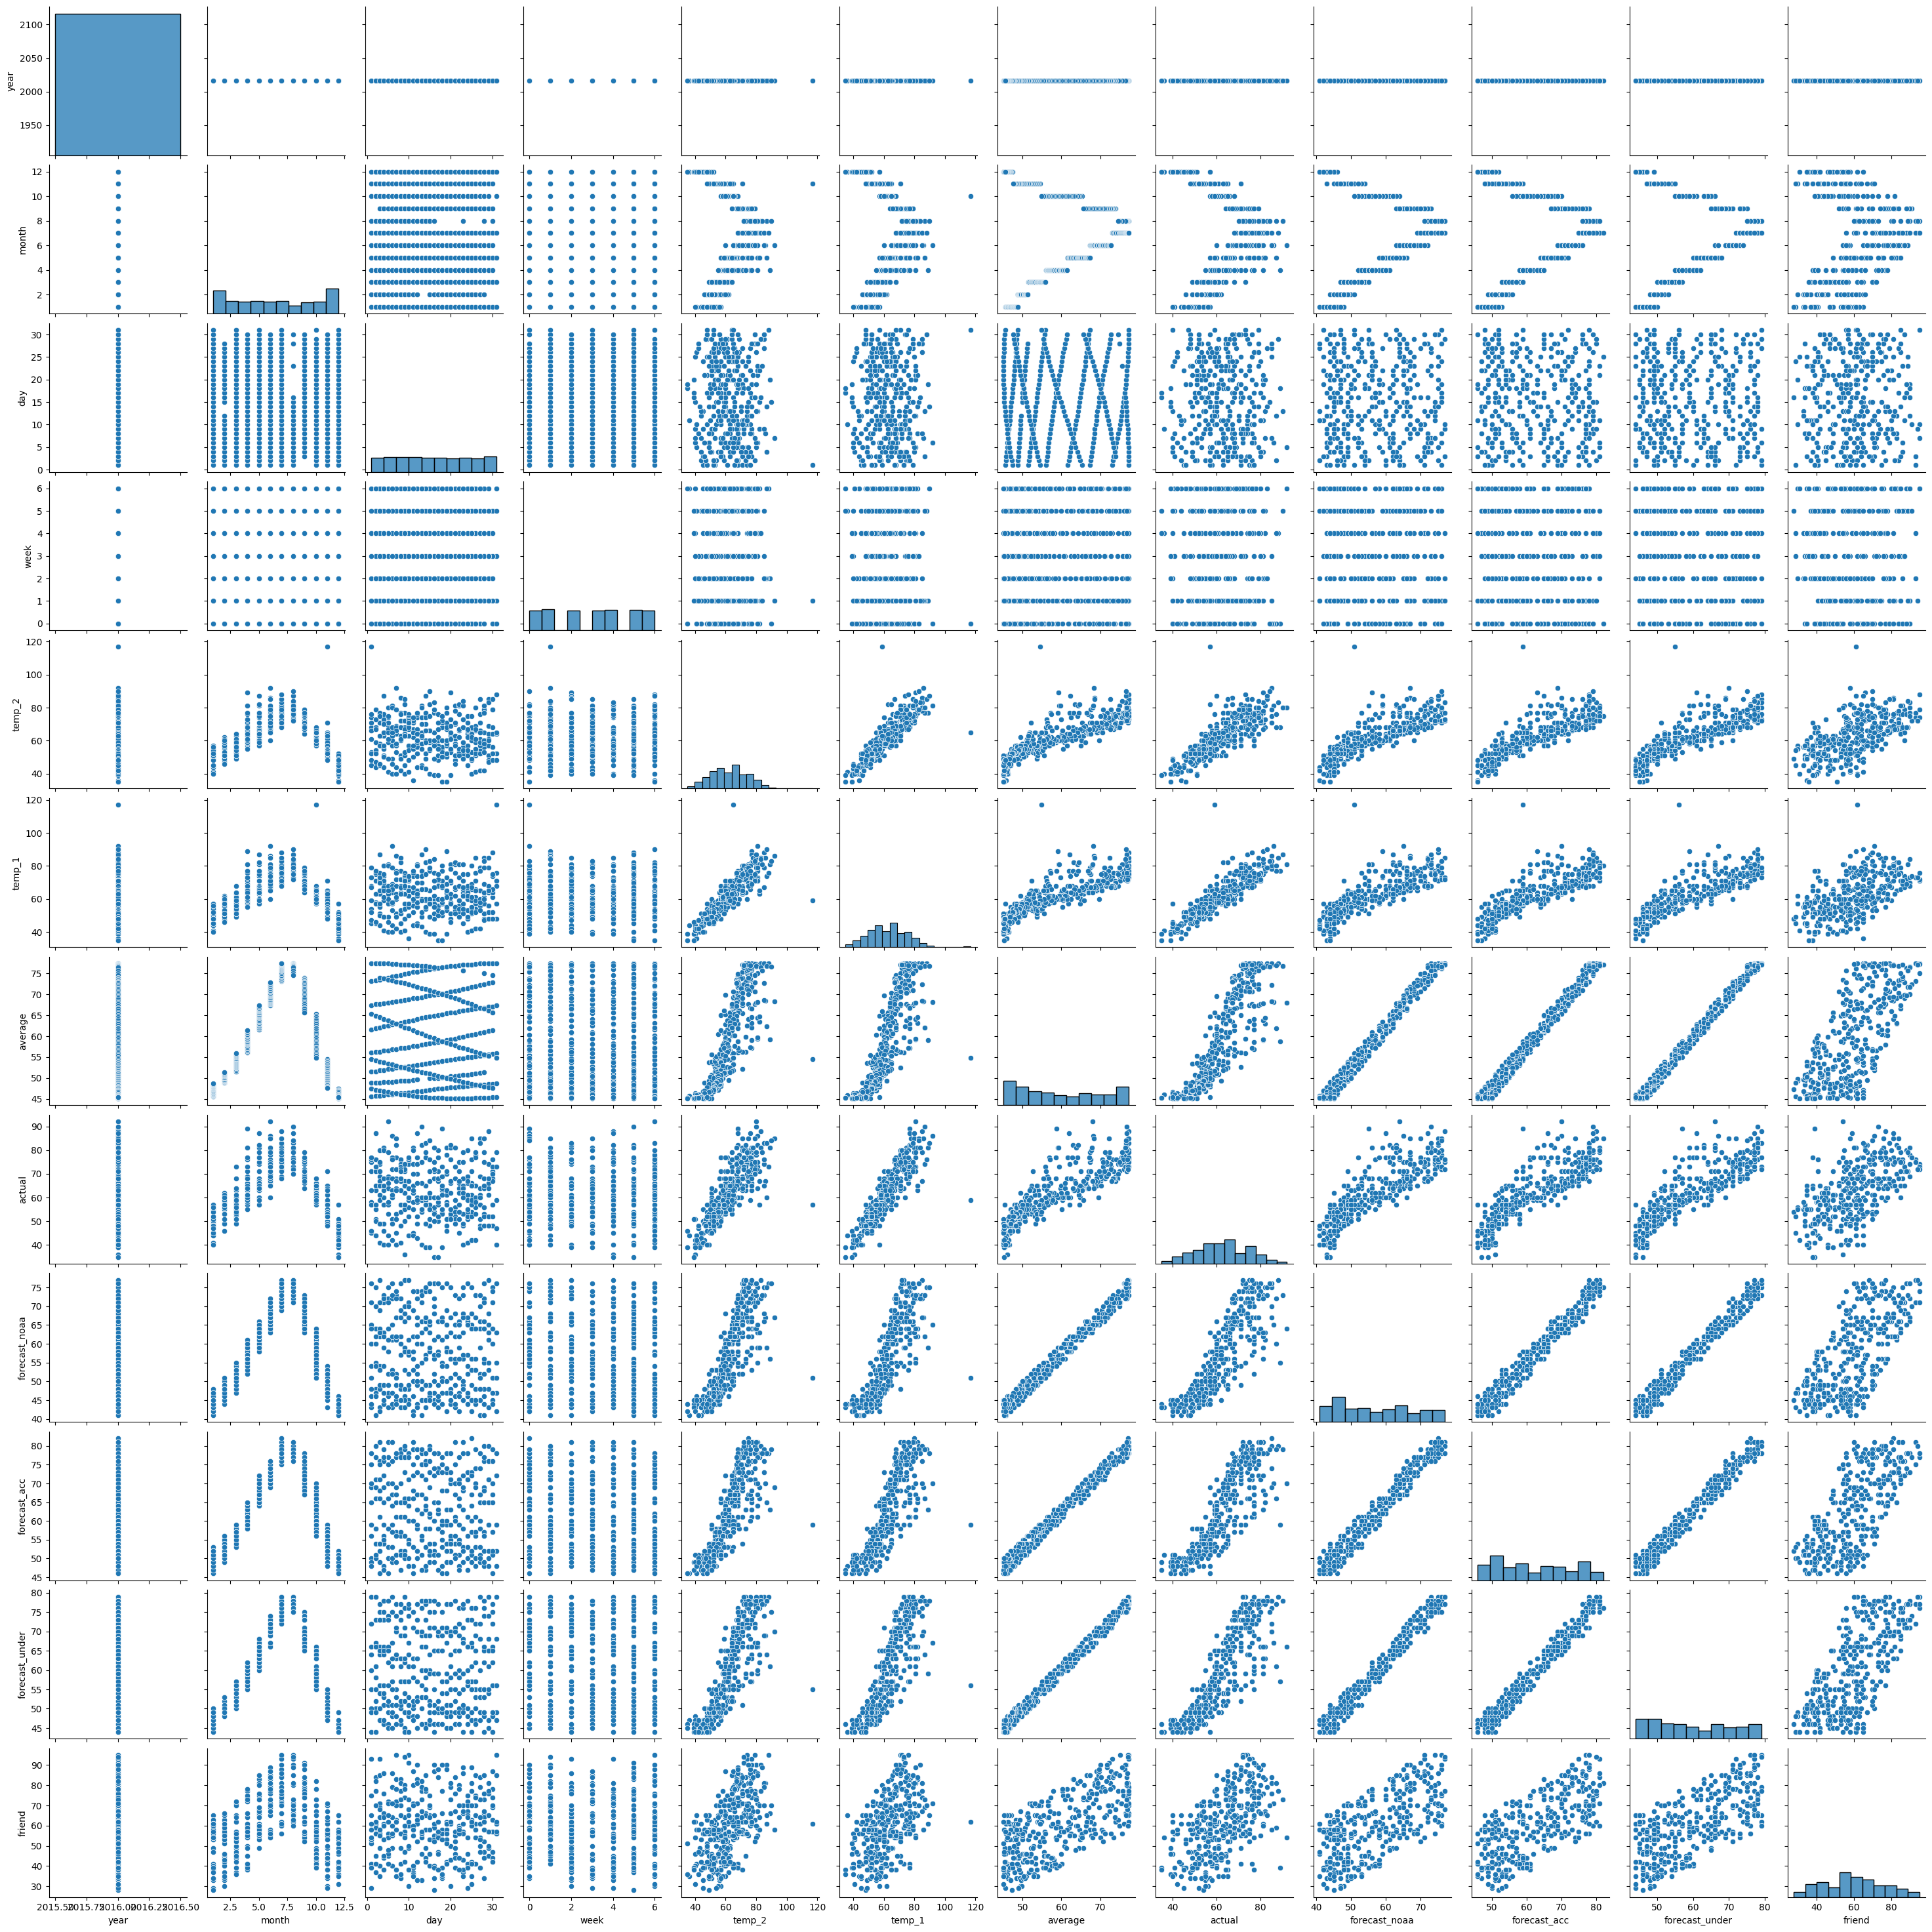

In [8]:
sns.pairplot(df)

<Axes: >

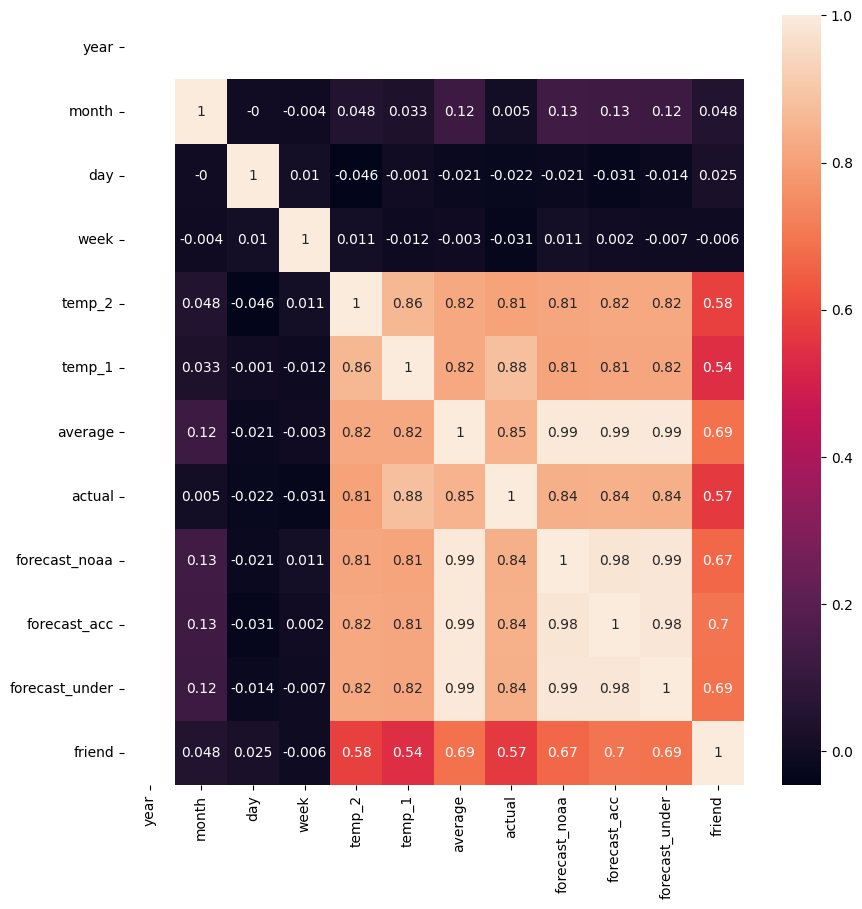

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(3),annot=True)

### 3. Selecciona variables y divide en train y test

In [35]:
data=df.drop(["day","week","actual","friend"], axis=1)
data


,year,month,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,temp_15
0,2016,1,45,45,45.6,43,50,44,0
1,2016,1,44,45,45.7,41,50,44,0
2,2016,1,45,44,45.8,43,46,47,0
3,2016,1,44,41,45.9,44,48,46,0
4,2016,1,41,40,46.0,46,46,46,0
...,...,...,...,...,...,...,...,...,...
343,2016,12,42,42,45.2,41,50,47,0
344,2016,12,42,47,45.3,41,49,44,0
345,2016,12,47,48,45.3,43,50,45,0
346,2016,12,48,48,45.4,44,46,44,0


In [36]:
target = df["actual"]
target

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(x_train)
# X_test_scaled = scaler.transform(x_test)

### 4. Entrena el modelo


In [38]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2,
                                  random_state=10)

model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=10)

### 5. Evaluación de tu modelo

Calcula el MAE, MAPE, MSE y RMSE.

In [39]:
predict = model.predict(x_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
print("Train MAE:", sklearn.metrics.mean_absolute_error(y_train, model.predict(x_train)))
print("Test MAE:", sklearn.metrics.mean_absolute_error(y_test, predict))
print()
print("Train MAPE:", sklearn.metrics.mean_absolute_percentage_error(y_train, model.predict(x_train)))
print("Test MAPE:", sklearn.metrics.mean_absolute_percentage_error(y_test, predict))
print()
print("Train MSE:", sklearn.metrics.mean_squared_error(y_train, model.predict(x_train)))
print("Test MSE:", sklearn.metrics.mean_squared_error(y_test, predict))
print()
print("Train RMSE:", sklearn.metrics.root_mean_squared_error(y_train, model.predict(x_train)))
print("Test RMSE:", sklearn.metrics.root_mean_squared_error(y_test, predict))
print()
print("Train Score:", model.score(x_train, y_train))
print("Test Score:", model.score(x_test,y_test))

Train MAE: 3.7805930235099408
Test MAE: 4.096040754329903

Train MAPE: 0.061247678423770324
Test MAPE: 0.06560461359803205

Train MSE: 23.150766263542604
Test MSE: 28.587898150623236

Train RMSE: 4.811524318087003
Test RMSE: 5.346765204366396

Train Score: 0.8268293761366722
Test Score: 0.8189179848676098


### 6. Representa el árbol de decisión

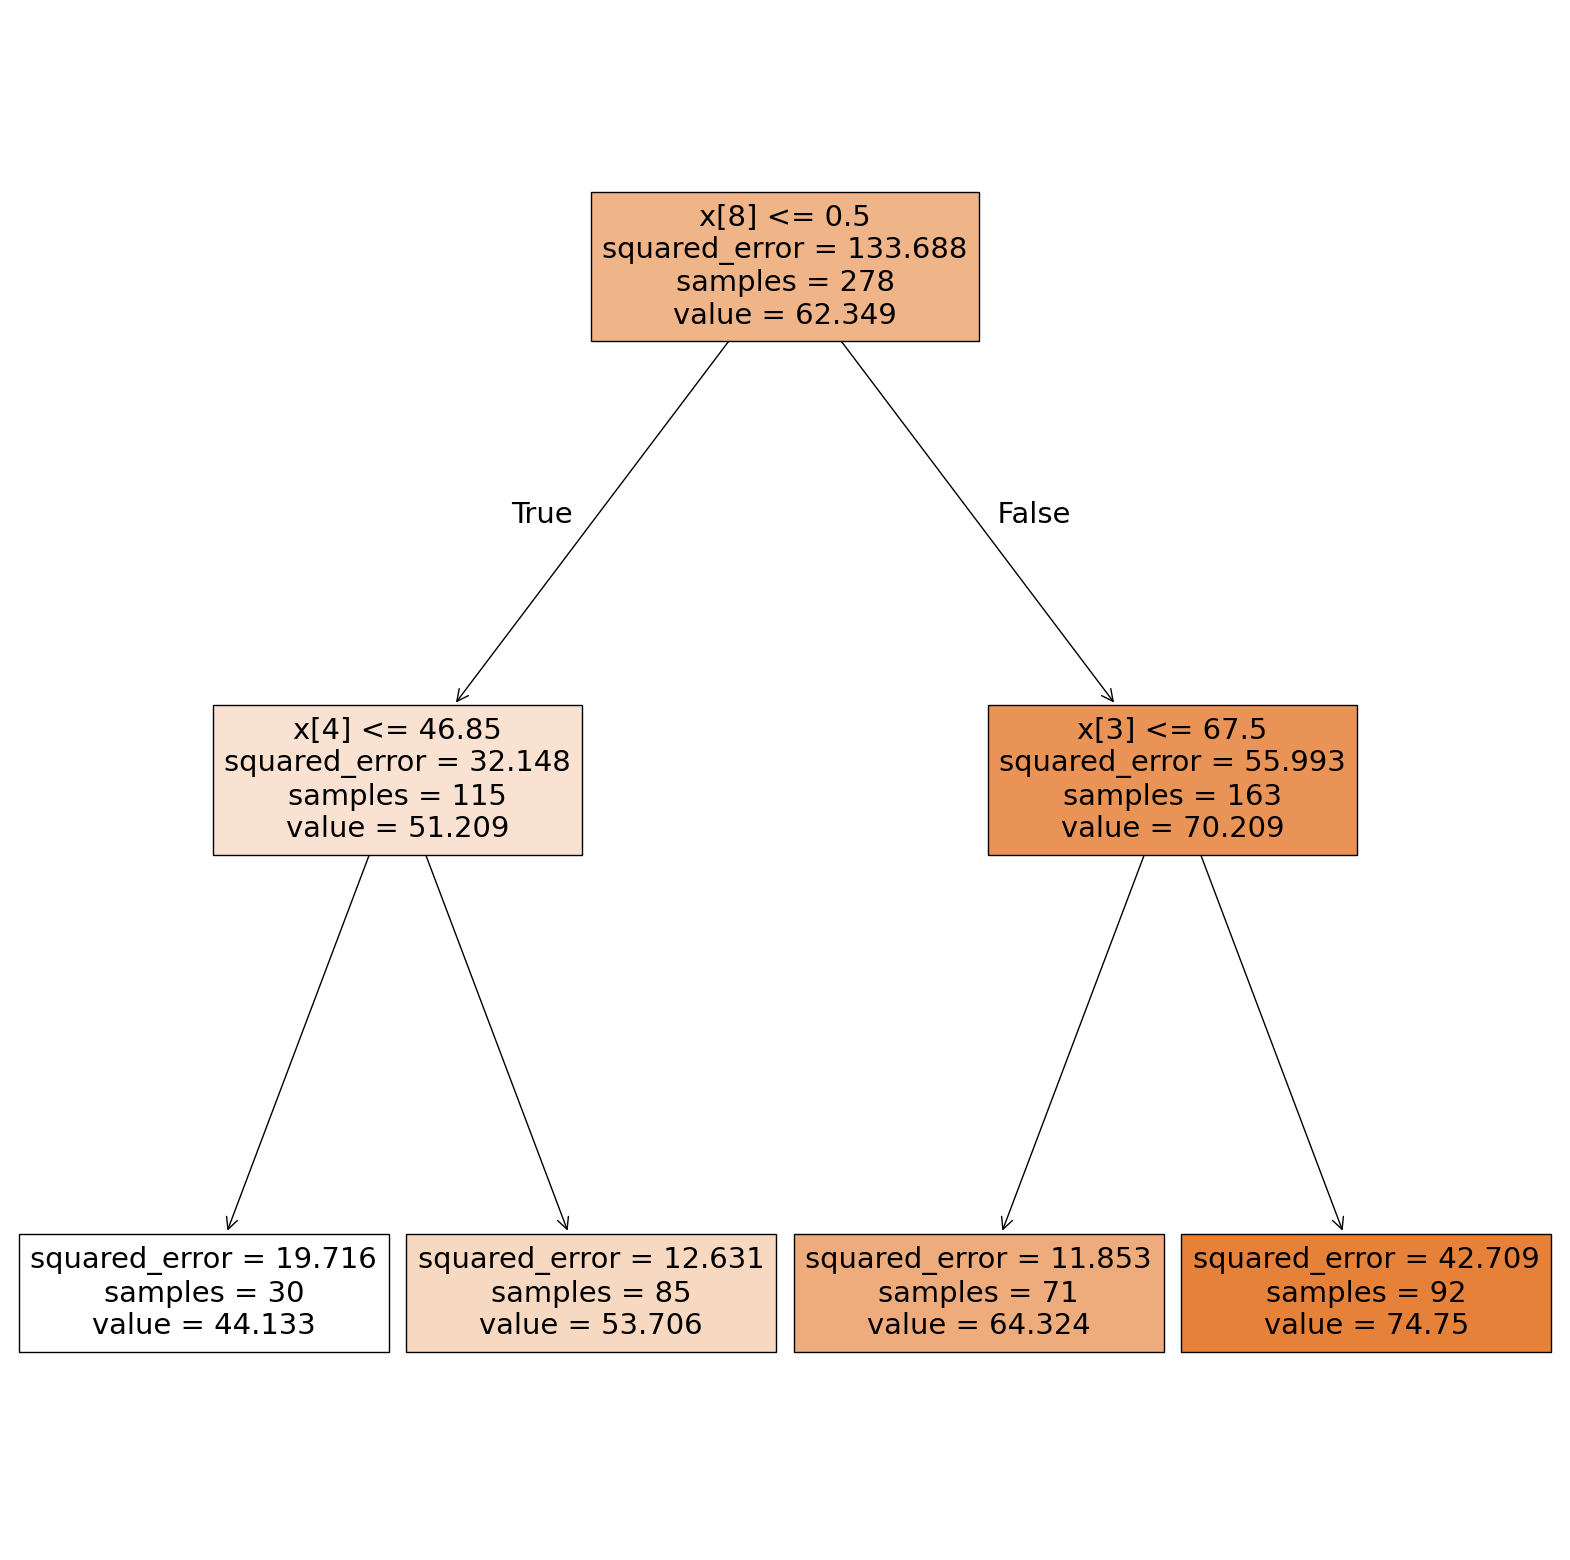

In [41]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(model,
               filled = True);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [42]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3,
                                  random_state=10)

model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

### 8. Vuelve a evaluar tu modelo

In [43]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
print("Train MAE:", sklearn.metrics.mean_absolute_error(y_train, model.predict(x_train)))
print("Test MAE:", sklearn.metrics.mean_absolute_error(y_test, predict))
print()
print("Train MAPE:", sklearn.metrics.mean_absolute_percentage_error(y_train, model.predict(x_train)))
print("Test MAPE:", sklearn.metrics.mean_absolute_percentage_error(y_test, predict))
print()
print("Train MSE:", sklearn.metrics.mean_squared_error(y_train, model.predict(x_train)))
print("Test MSE:", sklearn.metrics.mean_squared_error(y_test, predict))
print()
print("Train RMSE:", sklearn.metrics.root_mean_squared_error(y_train, model.predict(x_train)))
print("Test RMSE:", sklearn.metrics.root_mean_squared_error(y_test, predict))
print()
print("Train Score:", model.score(x_train, y_train))
print("Test Score:", model.score(x_test,y_test))

Train MAE: 3.223202395730535
Test MAE: 4.096040754329903

Train MAPE: 0.05154712505095115
Test MAPE: 0.06560461359803205

Train MSE: 16.92990868351373
Test MSE: 28.587898150623236

Train RMSE: 4.114597025653148
Test RMSE: 5.346765204366396

Train Score: 0.8733621680034787
Test Score: 0.8597672048488116


### 9. Vuelve a representar su árbol

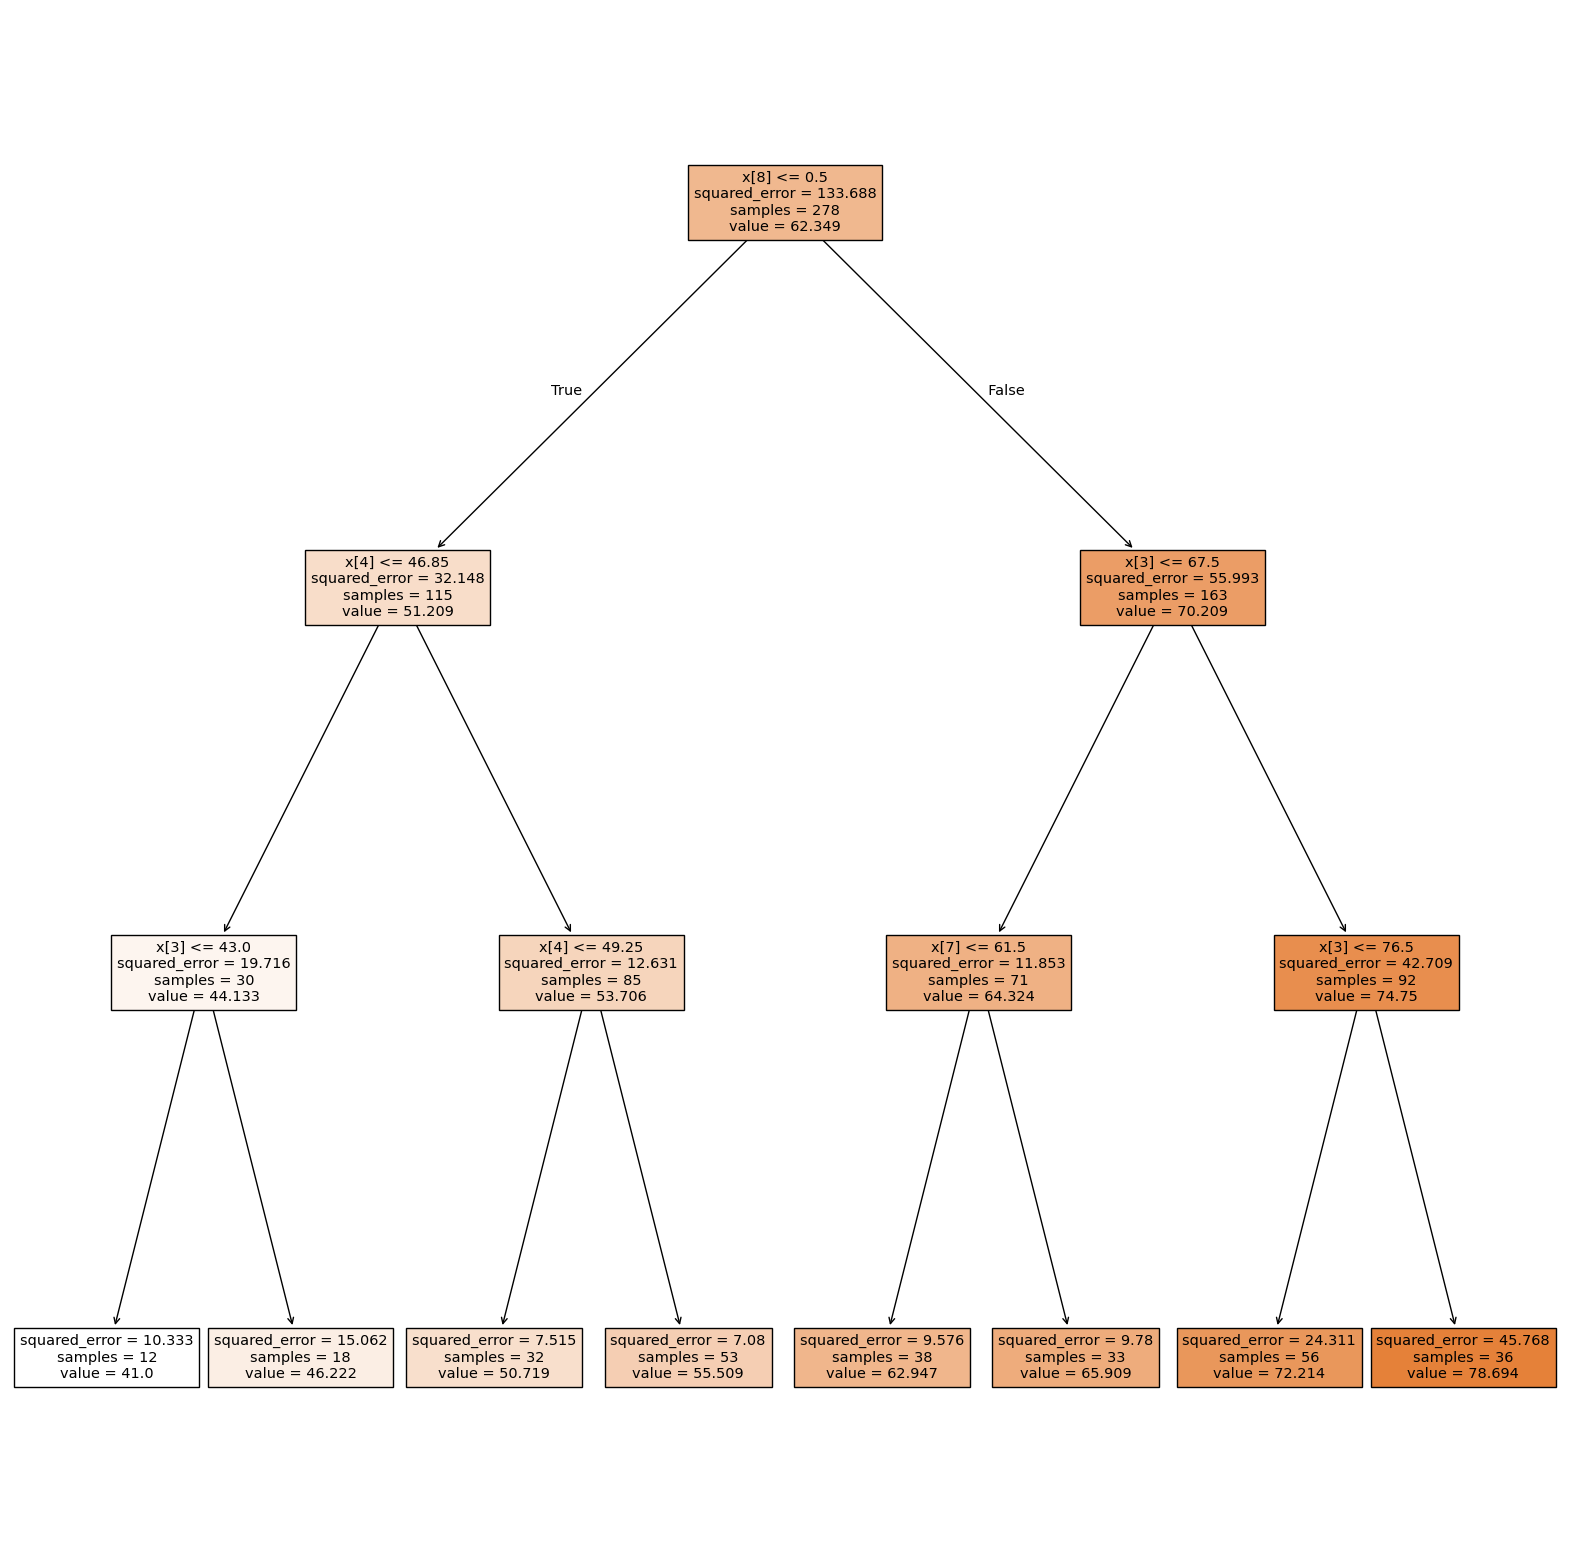

In [44]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(model,
               filled = True);

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()

parameters = {
    "max_depth" : [2,3,4,5],
    "min_samples_leaf" : [5,10,15,20]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")
dtr_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [22]:
y_pred = dtr_gs.best_estimator_.predict(x_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Train Score:", dtr_gs.best_estimator_.score(x_train, y_train))
print("Test Score:", dtr_gs.best_estimator_.score(x_test,y_test))

MAE 4.092585979145087
MAPE 0.06647184073637694
MSE 25.664210403012667
RMSE 5.065985629965078
Train Score: 0.8534084005522882
Test Score: 0.837437264115275


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [23]:
dtr_gs.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.18620012, 0.80521131,
       0.        , 0.        , 0.00858857])

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10,
                                  random_state=10)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

parameters = {
    "max_depth" : [2,3,4,5,10,20],
    "min_samples_leaf" : [5,10,15,20,30,40]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")
dtr_gs.fit(x_train, y_train)

c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 30, 40]},
             scoring='neg_mean_absolute_error')

In [26]:
y_pred = dtr_gs.best_estimator_.predict(x_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Train Score:", dtr_gs.best_estimator_.score(x_train, y_train))
print("Test Score:", dtr_gs.best_estimator_.score(x_test,y_test))

MAE 4.5
MAPE 0.07010276133463526
MSE 34.614285714285714
RMSE 5.883390664768549
Train Score: 0.2949640287769784
Test Score: 0.08571428571428572


In [27]:
df['temp_15'] = (df['actual'] > 59).astype(int)
print(df['temp_15'].value_counts())

temp_15
1    204
0    144
Name: count, dtype: int64


In [28]:

x = df.drop(["day","week","actual","friend", 'temp_15',"year" ], axis=1)
y = df['temp_15']


In [29]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)


In [30]:
dt_clf = DecisionTreeClassifier(random_state=10)

param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 

grid_search = GridSearchCV(estimator=dt_clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           refit=True)

In [31]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Utilizamos el best_estimator_ para predecir
y_pred = grid_search.best_estimator_.predict(x_test)

# Evaluamos el desempeño
print("Accuracy en test:", accuracy_score(y_test, y_pred))
print()
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print()
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy en test: 0.9285714285714286

Matriz de confusión:
 [[25  4]
 [ 1 40]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.91      0.98      0.94        41

    accuracy                           0.93        70
   macro avg       0.94      0.92      0.93        70
weighted avg       0.93      0.93      0.93        70

